##Import packages

In [0]:
from pathlib import Path
import pandas as pd
import csv
import os
from google.colab import drive
from fastai.vision import *

In [0]:
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
'''
MAKE SURE TO CHANGE METHOD PARAMETERS AS NECCESSARY WHENEVER CHANGING THE DISASTER TYPE. THANKS!!
'''

'\nMAKE SURE TO CHANGE METHOD PARAMETERS AS NECCESSARY WHENEVER CHANGING THE DISASTER TYPE. THANKS!!\n'

##Navigate to appropriate directories 

In [0]:
%cd /gdrive

/gdrive


In [0]:
cd 'My Drive/Senior Year/Sys Lab 2'

/gdrive/My Drive/Senior Year/Sys Lab 2


##Methods to set up annotations template .csv

In [0]:
classes = ['photo_ID', 'earthquake', 'flooding', 'fire', 'hurricane', 'bridge', 'normal', 'building_damage', 'roads', 'low_vegetation',
           'high_vegetation', 'river', 'rough_terrain']

In [0]:
path_first_100s = Path('.') / 'images' / 'first_100s'
print(path_first_100s.exists())

True


In [0]:
def make_csv(list_classes, photo_filepaths):
    """
    :param list_classes: the labels for all the images
    :param photo_filepaths: self-explanatory
    :return: a .csv file ready for annotations ;). Yay!
    """

    with open('multi_annotations.csv', 'a') as csvFile:
        writer = csv.DictWriter(csvFile, fieldnames = list_classes)
        writer.writeheader()

        for file_path in photo_filepaths:
            fp_str = str(file_path)
            dis_type = fp_str[fp_str.rfind('/') + 1: fp_str.rfind('_')]
            dis_index = list_classes.index(dis_type)
            writer.writerow(set_dict(file_path, dis_index))

In [0]:
def path_photos_list(path_to_disaster):
    """
    :param path_to_disaster: the path to a disaster folder (e.g. “earthquake”)
    :return: a list of all the photo paths/directories inside of a folder containing all the photos of a disaster
    of a particular type
    """
    to_ret = []
    disaster_photos = sorted(path_to_disaster.glob('*'))

    for i in range(5):
        dis_pho_slice = disaster_photos[i*100: (i + 1) * 100]
        dp_slice = sorted(dis_pho_slice, key=lambda x: int(str(x)[str(x).rfind('_') + 1: str(x).rfind('.')]))
        to_ret += dp_slice

    return to_ret

In [0]:
def set_dict(fp, index_of_disaster):
    """
    Helper method for writing csv file in the 'make_csv(...)' method right above
    :param fp: filepath
    :return: dictionary in format {class (or label of photo): (binary choice of 0 == False or 1 == True)}
    """
    output_list = [fp] + [0 for _ in range(len(classes) - 1)]
    output_list[index_of_disaster] = 1
    return {classes[i]: output_list[i] for i in range(len(classes))}

In [0]:
dis_pho_paths = path_photos_list(path_first_100s)
# print(len(dis_pho_paths))
# print(dis_pho_paths)

make_csv(classes, dis_pho_paths)

In [0]:
path_photos_list(path_first_100s)

##Make "tags" column + Format .csv file the Tutorial Style

In [0]:
ls

 create_dataset_annotations   multi_annotations.csv      temp
 gdrive_fastai_CNN            multi_annotations.gsheet  'Useful Links.gdoc'
 images/                      multilabel


In [0]:
annotations = pd.read_csv('multi_annotations.csv')

In [0]:
def add_tags_col(pand_row):
	col_names = list(annotations.columns)
	curr_row = list(pand_row) 
	tags_list = [col_names[i] for i in range(len(curr_row)) if curr_row[i] == 1]
	return ' '.join(tags_list)


In [0]:
def remove_all_but_name(pand_row):
	return list(pand_row)[0].split('/')[2]


In [0]:
print(annotations.shape)
print(annotations.head())

In [0]:
annotations['photo_ID'] = annotations.apply(remove_all_but_name, axis = 1)

In [0]:
annotations.loc[:, 'tags'] = annotations.apply(add_tags_col, axis = 1)

In [0]:
annotations.loc[:, 'tags'].head()

# could have also done annotations.tags.head()

0               earthquake normal road high_vegetation
1               earthquake normal road high_vegetation
2    earthquake hurricane normal low_vegetation riv...
3         earthquake struct_damage road low_vegetation
4    earthquake bridge struct_damage road low_veget...
Name: tags, dtype: object

In [0]:
print(annotations.head())
print(annotations.tail())

           photo_ID  ...                                               tags
0  earthquake_0.jpg  ...             earthquake normal road high_vegetation
1  earthquake_1.jpg  ...             earthquake normal road high_vegetation
2  earthquake_2.jpg  ...  earthquake hurricane normal low_vegetation riv...
3  earthquake_3.jpg  ...       earthquake struct_damage road low_vegetation
4  earthquake_4.jpg  ...  earthquake bridge struct_damage road low_veget...

[5 rows x 15 columns]
          photo_ID  earthquake  ...           test                         tags
495  normal_95.jpg           0  ...  normal_95.jpg                  normal road
496  normal_96.jpg           0  ...  normal_96.jpg     bridge normal road river
497  normal_97.jpg           0  ...  normal_97.jpg  normal road high_vegetation
498  normal_98.jpg           0  ...  normal_98.jpg                  normal road
499  normal_99.jpg           0  ...  normal_99.jpg                  normal road

[5 rows x 15 columns]


In [0]:
annotations = pd.concat([annotations.photo_ID, annotations.tags], axis = 1)

In [0]:
print(annotations.head())
print('\n')
print(annotations.tail())

           photo_ID                                               tags
0  earthquake_0.jpg             earthquake normal road high_vegetation
1  earthquake_1.jpg             earthquake normal road high_vegetation
2  earthquake_2.jpg  earthquake hurricane normal low_vegetation riv...
3  earthquake_3.jpg       earthquake struct_damage road low_vegetation
4  earthquake_4.jpg  earthquake bridge struct_damage road low_veget...


          photo_ID                         tags
495  normal_95.jpg                  normal road
496  normal_96.jpg     bridge normal road river
497  normal_97.jpg  normal road high_vegetation
498  normal_98.jpg                  normal road
499  normal_99.jpg                  normal road


In [0]:
ls

'Copy of multi_annotations.gsheet'   multi_annotations.gsheet
 create_dataset_annotations          multilabel
 dataset/                            temp
 gdrive_fastai_CNN                  'Useful Links.gdoc'
 multi_annotations.csv


In [0]:
annotations.to_csv('multi_annotations.csv', index = False)

##Following FastAI Multi-label tutorial
(source: https://gilberttanner.com/blog/fastai-multi-label-image-classification)

In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
path_to_dataset = Path('./dataset')
path_to_dataset.exists()

True

In [0]:
np.random.seed(42) # set random seed so we always get the same validation set
src = (ImageList.from_csv(path_to_dataset, 'multi_annotations.csv', folder='first_100s')
       # Load data from df
       .split_by_rand_pct(0.2)
       # split data into training and validation set (20% validation)
       .label_from_df(label_delim=' ')
       # label data using the tags column (second column is default)
)
print(src)

LabelLists;

Train: LabelList (400 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: MultiCategoryList
earthquake;normal;road;high_vegetation,earthquake;struct_damage;road;low_vegetation,earthquake;bridge;struct_damage;road;low_vegetation;rough_terrain,earthquake;normal;struct_damage;low_vegetation,earthquake;normal;low_vegetation;rough_terrain
Path: dataset;

Valid: LabelList (100 items)
x: ImageList
Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500),Image (3, 500, 500)
y: MultiCategoryList
hurricane;normal;road;low_vegetation,earthquake;normal;road;low_vegetation,hurricane;struct_damage;road,fire;road;low_vegetation,fire
Path: dataset;

Test: None


In [0]:
data = (src.transform(tfms, size=128)
        .databunch(bs=64).normalize(imagenet_stats))

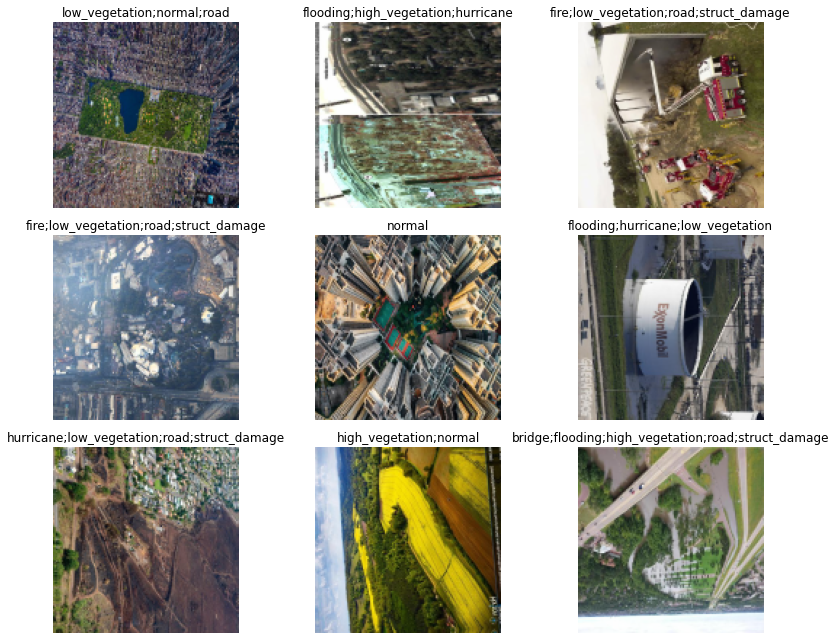

In [0]:
data.show_batch(rows=3, figsize=(12, 9))

In [0]:
# create metrics
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
# create cnn with the resnet50 architecture
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


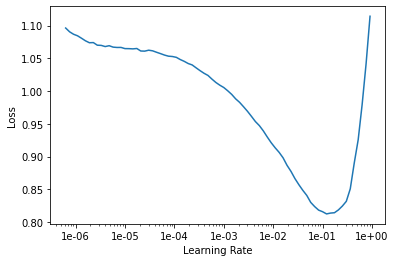

In [0]:
# learn.lr_find() # find learning rate
# learn.recorder.plot() # plot learning rate

In [0]:
lr = 0.01 # chosen learning rate

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.996387,1.850834,0.440000,0.603335,02:35
1,0.883589,1.004886,0.550833,0.592916,01:26
2,0.773380,0.766513,0.600833,0.594404,01:26
3,0.699593,0.662632,0.598333,0.640929,01:26


In [0]:
learn.fit_one_cycle(5, lr) # train model for 4 epochs

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.158220,0.662378,0.735833,0.628820,01:27
1,0.147754,0.718507,0.751667,0.650085,01:27
2,0.153065,0.798983,0.755833,0.577520,01:26
3,0.151289,0.769789,0.742500,0.589027,01:27
4,0.144453,0.736466,0.745833,0.602113,01:27


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


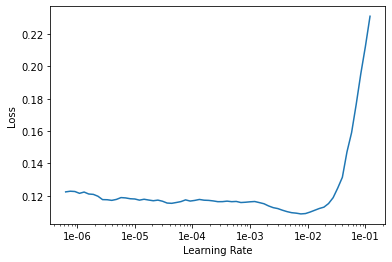

In [0]:
learn.freeze()
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate

In [0]:
learn.fit_one_cycle(1, 1*10**-2.5)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.031748,0.941234,0.778333,0.611114,01:24


In [0]:
learn.save('joseph_mNN-6', return_path = True) # save model

PosixPath('dataset/models/joseph_mNN-6.pth')

In [0]:
learn.export()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

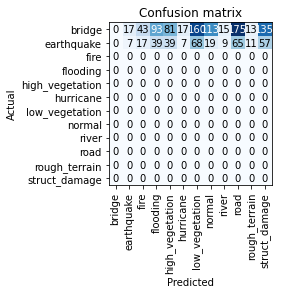

In [0]:
interp.plot_confusion_matrix()